# Sonar Dataset Case

Import necessary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


# Load the dataset

In [53]:
sonar_df=pd.read_csv('sonar_all_data.csv', names = range(0,61),header = 0)
sonar_df.head(7)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R


# Basic Exploratory of Data

In [54]:
sonar_df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
sonar_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [56]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

In [57]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.



The data has a categorical data which classifies whether the output is rock or mine, the first step is to convet that to numerical data using LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
sonar_df[60]=le.fit_transform(sonar_df[60])

In [60]:
sonar_df[60]

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int32

In [61]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

In [62]:
sonar_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


Too man data point in the dataset hence using PCA (Principal Component Analysis) to compile the data for studying the data better

In [63]:
x=sonar_df.iloc[:,:-1]
x.shape

(207, 60)

In [64]:
y=sonar_df.iloc[:,-1]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int32


In [65]:
y=np.array(sonar_df.iloc[:,-1])
print(y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [67]:
y.shape

(207,)

In [68]:
pca=PCA(n_components=12)

In [69]:
x=pca.fit_transform(x)

In [70]:
x.shape

(207, 12)

In [71]:
##pd.DataFrame(data=x)

In [72]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
len(y)

207

In [74]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [75]:
x = scale.fit_transform(x)

In [76]:
x[206]

array([-0.05881343, -1.52693138,  0.02376526, -0.13604412, -0.10241586,
       -0.12117055,  0.09355437, -0.08906321,  0.60847198, -0.75807236,
       -1.19853581, -0.72937591])

In [77]:
y[206]

0

In [78]:
##x = pd.DataFrame(data=x)

In [79]:
x.shape

(207, 12)

In [80]:
y.shape

(207,)

In [81]:
y.dtype

dtype('int32')

In [82]:
len(x)

207

In [83]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = .33, random_state = 45)

In [84]:
lr=LogisticRegression()

In [85]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8115942028985508
[[34  3]
 [10 22]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        37
           1       0.88      0.69      0.77        32

    accuracy                           0.81        69
   macro avg       0.83      0.80      0.81        69
weighted avg       0.82      0.81      0.81        69



In [86]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.7681159420289855
[[32  5]
 [11 21]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.81      0.66      0.72        32

    accuracy                           0.77        69
   macro avg       0.78      0.76      0.76        69
weighted avg       0.77      0.77      0.76        69



In [87]:
svc = SVC()

In [88]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8260869565217391
[[34  3]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.88      0.72      0.79        32

    accuracy                           0.83        69
   macro avg       0.84      0.82      0.82        69
weighted avg       0.83      0.83      0.82        69



In [89]:
dt = DecisionTreeClassifier()

In [90]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7536231884057971
[[33  4]
 [13 19]]
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.83      0.59      0.69        32

    accuracy                           0.75        69
   macro avg       0.77      0.74      0.74        69
weighted avg       0.77      0.75      0.75        69



# CROSS VALIDATION

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
gnbscores = cross_val_score(gnb , x,y, cv=5)
print(gnbscores)
print(gnbscores.mean() , gnbscores.std())

[0.38095238 0.69047619 0.3902439  0.70731707 0.3902439 ]
0.5118466898954703 0.15285611872839056


In [93]:
svc_scores = cross_val_score(svc,x,y,cv=5)
print(svc_scores)
print(svc_scores.mean() , svc_scores.std())

[0.42857143 0.69047619 0.48780488 0.75609756 0.3902439 ]
0.5506387921022067 0.1458374892239109


In [94]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean() , dtscores.std())

[0.35714286 0.80952381 0.48780488 0.73170732 0.6097561 ]
0.5991869918699188 0.16303757719181639


In [95]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean() , lrscores.std())

[0.33333333 0.69047619 0.68292683 0.82926829 0.51219512]
0.6096399535423925 0.17087007595485848


The 

In [96]:
print('Accuracy Score of Logistic_Regression = ',accuracy_score(y_test,predlr),'\n' 'Cross_Validation Score of Logistic Regression = ',lrscores.mean())
print('\n')
print('Accuracy Score of GNB = ',accuracy_score(y_test,predgnb),'\n' 'Cross_Validation Score of GNB = ',gnbscores.mean())
print('\n')
print('Accuracy Score of SVC = ',accuracy_score(y_test,predsvc),'\n' 'Cross_Validation Score of SVC = ',svc_scores.mean())
print('\n')
print('Accuracy Score of DecisionTreeClassifier = ',accuracy_score(y_test,preddt),'\n' 'Cross_Validation Score of DecisionTreeClassifier = ',dtscores.mean())

Accuracy Score of Logistic_Regression =  0.8115942028985508 
Cross_Validation Score of Logistic Regression =  0.6096399535423925


Accuracy Score of GNB =  0.7681159420289855 
Cross_Validation Score of GNB =  0.5118466898954703


Accuracy Score of SVC =  0.8260869565217391 
Cross_Validation Score of SVC =  0.5506387921022067


Accuracy Score of DecisionTreeClassifier =  0.7536231884057971 
Cross_Validation Score of DecisionTreeClassifier =  0.5991869918699188


** The test results shows a better accuracy score with Suppor Vector Classifier ie approx 82.60% with mean CV as approximately 55% whereas the accuracy score of Logistic Regression is approx 81% but the mean CV score is around 61%

@@ Hence we can proceed with Logistic Regression as best fit model for Sonar Pracice case.

# AUC_ROC Curve

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

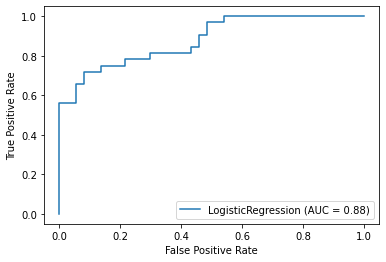

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test,y_test)
plt.show()

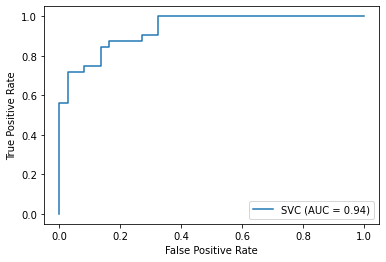

In [99]:
#from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test,)
plt.show()

* SVC auc_score is 94% whereas Logistic Regression score is 87% which confirms that suppor vector model fits best for this case.

# Serialization

In [100]:
import joblib

In [101]:
joblib.dump(svc,'SonarProject.pkl')

['SonarProject.pkl']

# Conclusion

In [104]:
a=np.array(y_test)
p = np.array(svc.predict(x_test))
print(a)
print('\n')
print(p)
df_sonar=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))

[0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0]


[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0]


In [105]:
df_sonar

,Original,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
64,1,1
65,1,0
66,0,1
67,0,0
